# 제품 이상여부 판별 프로젝트

Auto clave EDA

## 1. 데이터 불러오기

In [941]:
import warnings
import pandas as pd

# DtypeWarning 무시
warnings.filterwarnings('ignore', category=pd.errors.DtypeWarning)

# 데이터 파일 경로
file_path_csv = '../../data/Auto clave.csv'
file_path_target = '../../data/train_y.csv'

# 데이터 파일 읽기
csv_AutoClave = pd.read_csv(file_path_csv)
csv_target = pd.read_csv(file_path_target)

# csv_AutoClave & csv_target 병합
df_AutoClave = pd.merge(csv_AutoClave, csv_target, "inner", on="Set ID")

In [942]:
# 출력 다 하고 싶을때 사용하는 코드

## 출력 모두 보기
pd.set_option('display.max_rows', None)

# -- 여기에 코드 작성 --

## 출력 모두 보기 취소 (원래대로 바꾸기)
pd.reset_option('display.max_rows')

In [943]:
df_AutoClave.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42446 entries, 0 to 42445
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Wip Line          42446 non-null  object 
 1   Process Desc.     42446 non-null  object 
 2   Equipment         42446 non-null  object 
 3   Model.Suffix      42446 non-null  object 
 4   Workorder         42446 non-null  object 
 5   LOT ID            42446 non-null  object 
 6   Set ID            42446 non-null  object 
 7   Box ID            0 non-null      float64
 8   Collect Date      42446 non-null  object 
 9   Insp. Seq No.     42446 non-null  int64  
 10  Insp Judge Code   42446 non-null  object 
 11  Collect Result    42446 non-null  float64
 12  Unit Time         42446 non-null  int64  
 13  Judge Value       42446 non-null  object 
 14  Collect Result.1  42446 non-null  float64
 15  Unit Time.1       42446 non-null  int64  
 16  Judge Value.1     42446 non-null  object

In [944]:
import pandas as pd

# 기존 변수 이름
old_columns = [
    'Collect Result', 'Unit Time', 'Judge Value',
    'Collect Result.1', 'Unit Time.1', 'Judge Value.1',
    'Collect Result.2', 'Unit Time.2', 'Judge Value.2',
    'Collect Result.3', 'Unit Time.3', 'Judge Value.3',
    'Collect Result.4', 'Unit Time.4', 'Judge Value.4'
]

# 새로운 변수 이름
new_columns = [
    '1st Pressure', '1st Pressure.1', '1st Pressure.2',
    '2nd Pressure', '2nd Pressure.1', '2nd Pressure.2',
    '3rd Pressure', '3rd Pressure.1', '3rd Pressure.2',
    'Chamber Temp.', 'Chamber Temp..1', 'Chamber Temp..2',
    'GMES_ORIGIN_INSP_JUDGE_CODE', 'GMES_ORIGIN_INSP_JUDGE_CODE.1', 'GMES_ORIGIN_INSP_JUDGE_CODE.2'
]

# 변수 이름 변경
df_AutoClave.rename(columns=dict(zip(old_columns, new_columns)), inplace=True)

df_AutoClave.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42446 entries, 0 to 42445
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Wip Line                       42446 non-null  object 
 1   Process Desc.                  42446 non-null  object 
 2   Equipment                      42446 non-null  object 
 3   Model.Suffix                   42446 non-null  object 
 4   Workorder                      42446 non-null  object 
 5   LOT ID                         42446 non-null  object 
 6   Set ID                         42446 non-null  object 
 7   Box ID                         0 non-null      float64
 8   Collect Date                   42446 non-null  object 
 9   Insp. Seq No.                  42446 non-null  int64  
 10  Insp Judge Code                42446 non-null  object 
 11  1st Pressure                   42446 non-null  float64
 12  1st Pressure.1                 42446 non-null 

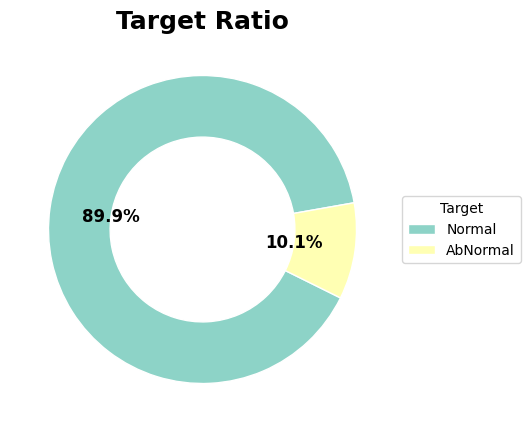

In [945]:
import matplotlib.pyplot as plt

# 'target' 변수의 비율 계산
target_ratio = df_AutoClave['target'].value_counts(normalize=True)

# 색상 팔레트 설정
colors = plt.get_cmap('Set3')(range(len(target_ratio)))

# 도넛 차트 그리기
fig, ax = plt.subplots(figsize=(5, 5))
wedges, texts, autotexts = ax.pie(
    target_ratio, 
    autopct='%1.1f%%', 
    startangle=10, 
    colors=colors, 
    wedgeprops=dict(width=0.4, edgecolor='w')
)

# 차트 제목 추가
ax.set_title('Target Ratio', fontsize=18, fontweight='bold')

# 레이블 및 퍼센트 텍스트 스타일 설정
plt.setp(texts, size=14, weight='bold', color='black')
plt.setp(autotexts, size=12, weight='bold', color='black')

# 범례 추가
ax.legend(wedges, target_ratio.index, title="Target", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# 차트 표시
plt.show()

### 1. Wip Line, Process Desc, Equiment

In [946]:
df_AutoClave['Wip Line'].value_counts()

IVI-OB6    42446
Name: Wip Line, dtype: int64

In [947]:
df_AutoClave['Process Desc.'].value_counts()

Auto Clave Out    42446
Name: Process Desc., dtype: int64

In [948]:
df_AutoClave['Equipment'].value_counts()

Auto Clave Out    42446
Name: Equipment, dtype: int64

3개의 변수 1가지 종류만 존재

### 2. Model.Suffix

In [949]:
df_AutoClave['Model.Suffix'].value_counts()

AJX75334501    35432
AJX75334502     3601
AJX75334505     2744
AJX75334507      312
AJX75334503      162
AJX75334506      133
AJX75334508       62
Name: Model.Suffix, dtype: int64

In [950]:
csv_AutoClave['Model.Suffix'].value_counts()

AJX75334501    50598
AJX75334502     5077
AJX75334505     3984
AJX75334507      450
EAT65200901      446
AJX75334503      228
AJX75334506      177
AJX75334508       92
Name: Model.Suffix, dtype: int64

- Suffix가 시리즈 이름(?) 인 AJX75334을 제외한 나머지 4글자   
ex) 4501 같은 값을 의미를 나타내는 것일수도 있다는 생각  

- 다른 공정에서 AJX75334 시리즈를 사용하는 기계(?) 가 있는것이 확인됨

- df_AutoClave 에는 EAT65200 시리즈가 없지만 target 변수의 값이 있는 데이터프레임과  
병합한 csv_AutoClave 에는 EAT65200 시리즈가 없음  

In [951]:
# 'Model.Suffix' 변수의 앞 8자리 값을 추출
csv_AutoClave['Model.Suffix_Prefix'] = csv_AutoClave['Model.Suffix'].str.slice(stop=8)

In [952]:
csv_AutoClave['Model.Suffix_Prefix'].value_counts()

AJX75334    60606
EAT65200      446
Name: Model.Suffix_Prefix, dtype: int64

이런식으로 앞의 8글자를 기준으로 그룹화 할수 있음

In [953]:
# 'Model.Suffix_Prefix' 값에 대한 'target' 변수의 비율 계산 

# # 'Model.Suffix_Prefix'가 'AJX75334'인 행들 필터링
# filtered_df = csv_AutoClave[csv_AutoClave['Model.Suffix_Prefix'] == 'AJX75334']

# # 'target' 변수의 비율 계산
# target_ratio = filtered_df['target'].value_counts(normalize=True)

# # 비율 출력
# print(target_ratio)

-> 병합안한 데이터라 계산 못해서 주석처리함

### 3. Workorder

In [954]:
df_AutoClave['Workorder'].value_counts()

3L1X8574-2    278
3K1XC268-1    236
3L1X8506-1    224
3L1X9934-1    224
3M1XH425-1    207
             ... 
4BPM0084-1      2
4A1XE569-1      2
3HPM0061-1      1
3H1XB714-1      1
4CPM0166-1      1
Name: Workorder, Length: 663, dtype: int64

In [955]:
# 'Workorder' 변수의 앞 1자리 값을 추출
df_AutoClave['Workorder_1'] = df_AutoClave['Workorder'].str.slice(stop=1)

In [956]:
df_AutoClave['Workorder_1'].value_counts()

3    29005
4    13441
Name: Workorder_1, dtype: int64

In [957]:
# 'Workorder_1' 값에 대한 'target' 변수의 비율 계산

# 'Workorder_1'가 '3'인 행들 필터링
filtered_df_3 = df_AutoClave[df_AutoClave['Workorder_1'] == '3']

# 'Workorder_1'가 '4'인 행들 필터링
filtered_df_4 = df_AutoClave[df_AutoClave['Workorder_1'] == '4']

# 'target' 변수의 비율 계산
target_ratio_3 = filtered_df_3['target'].value_counts(normalize=True)
target_ratio_4 = filtered_df_4['target'].value_counts(normalize=True)

# 비율 출력
print("Target ratio for Workorder_1 = 3:")
print(target_ratio_3)
print("\nTarget ratio for Workorder_1 = 4:")
print(target_ratio_4)

Target ratio for Workorder_1 = 3:
Normal      0.89157
AbNormal    0.10843
Name: target, dtype: float64

Target ratio for Workorder_1 = 4:
Normal      0.914887
AbNormal    0.085113
Name: target, dtype: float64


원본 데이터의 타겟변수 비율 Normal:89.9%, AbNormal:10.1% 와 비교했을때  
거의 차이가 없는것을 보임

In [958]:
# 'Workorder' 변수의 앞 1~2째자리 값을 추출
df_AutoClave['Workorder_2'] = df_AutoClave['Workorder'].str[1:2]

In [959]:
df_AutoClave['Workorder_2'].value_counts()

G    5024
M    4847
J    4300
A    4156
L    3925
H    3728
K    3404
B    3167
E    2870
F    2402
I    2378
C    2245
Name: Workorder_2, dtype: int64

In [960]:
# 'Workorder' 변수의 앞 2~3째자리 값을 추출
df_AutoClave['Workorder_3'] = df_AutoClave['Workorder'].str[2:4]

In [961]:
df_AutoClave['Workorder_3'].value_counts()

1X    41407
PM      635
PX      404
Name: Workorder_3, dtype: int64

In [962]:
# 'Workorder_3' 값에 대한 'target' 변수의 비율 계산

# 'Workorder_3'가 '0'인 행들 필터링
filtered_df_0 = df_AutoClave[df_AutoClave['Workorder_3'] == '1X']

# 'Workorder_3'가 '1'인 행들 필터링
filtered_df_1 = df_AutoClave[df_AutoClave['Workorder_3'] == 'PX']

# 'Workorder_3'가 '2'인 행들 필터링
filtered_df_2 = df_AutoClave[df_AutoClave['Workorder_3'] == 'PM']

# 'target' 변수의 비율 계산
filtered_df_0 = filtered_df_0['target'].value_counts(normalize=True)
filtered_df_1 = filtered_df_1['target'].value_counts(normalize=True)
filtered_df_2 = filtered_df_2['target'].value_counts(normalize=True)

# 비율 출력
print("Target ratio for Workorder_3 = 1X:")
print(filtered_df_0)
print("\nTarget ratio for Workorder_3 = PX:")
print(filtered_df_1)
print("\nTarget ratio for Workorder_3 = PM:")
print(filtered_df_2)

Target ratio for Workorder_3 = 1X:
Normal      0.899389
AbNormal    0.100611
Name: target, dtype: float64

Target ratio for Workorder_3 = PX:
Normal      0.779703
AbNormal    0.220297
Name: target, dtype: float64

Target ratio for Workorder_3 = PM:
Normal      0.946457
AbNormal    0.053543
Name: target, dtype: float64


In [963]:
# 'Workorder' 변수의 앞 5~7째자리 값을 추출
df_AutoClave['Workorder_4'] = df_AutoClave['Workorder'].str[5:8]

In [964]:
df_AutoClave['Workorder_4'].value_counts()

644    456
258    379
425    344
501    325
542    314
      ... 
062      3
064      2
569      2
714      1
061      1
Name: Workorder_4, Length: 439, dtype: int64

In [965]:
# 'Workorder' 변수의 앞 1자리 값을 추출
df_AutoClave['Workorder_5'] = df_AutoClave['Workorder'].str[9]

In [966]:
df_AutoClave['Workorder_5'].value_counts()

1    35304
2     6344
0      404
3      202
4      192
Name: Workorder_5, dtype: int64

In [967]:
# 'Workorder_5' 값에 대한 'target' 변수의 비율 계산

# 'Workorder_5'가 '0'인 행들 필터링
filtered_df_0 = df_AutoClave[df_AutoClave['Workorder_5'] == '0']

# 'Workorder_5'가 '1'인 행들 필터링
filtered_df_1 = df_AutoClave[df_AutoClave['Workorder_5'] == '1']

# 'Workorder_5'가 '2'인 행들 필터링
filtered_df_2 = df_AutoClave[df_AutoClave['Workorder_5'] == '2']

# 'Workorder_5'가 '3'인 행들 필터링
filtered_df_3 = df_AutoClave[df_AutoClave['Workorder_5'] == '3']

# 'Workorder_5'가 '4'인 행들 필터링
filtered_df_3 = df_AutoClave[df_AutoClave['Workorder_5'] == '4']

# 'target' 변수의 비율 계산
filtered_df_0 = filtered_df_0['target'].value_counts(normalize=True)
filtered_df_1 = filtered_df_1['target'].value_counts(normalize=True)
filtered_df_2 = filtered_df_2['target'].value_counts(normalize=True)
filtered_df_3 = filtered_df_3['target'].value_counts(normalize=True)
filtered_df_4 = filtered_df_4['target'].value_counts(normalize=True)

# 비율 출력
print("Target ratio for Workorder_5 = 0:")
print(filtered_df_0)
print("\nTarget ratio for Workorder_5 = 1:")
print(filtered_df_1)
print("Target ratio for Workorder_5 = 2:")
print(filtered_df_2)
print("\nTarget ratio for Workorder_5 = 3:")
print(filtered_df_3)
print("\nTarget ratio for Workorder_5 = 4:")
print(filtered_df_4)

Target ratio for Workorder_5 = 0:
Normal      0.779703
AbNormal    0.220297
Name: target, dtype: float64

Target ratio for Workorder_5 = 1:
Normal      0.898425
AbNormal    0.101575
Name: target, dtype: float64
Target ratio for Workorder_5 = 2:
Normal      0.90826
AbNormal    0.09174
Name: target, dtype: float64

Target ratio for Workorder_5 = 3:
Normal      0.890625
AbNormal    0.109375
Name: target, dtype: float64

Target ratio for Workorder_5 = 4:
Normal      0.914887
AbNormal    0.085113
Name: target, dtype: float64


workorder 값중 일부 값을 이용해서 그룹화 하는 방향성  
-> 분석상 완전히 이거다 하는것은 보이지는 x

### 4. LOT ID, Set ID, Box ID

In [968]:
df_AutoClave['LOT ID'].value_counts().head(3)

OP753345013080001009    4
OP753345013060003926    4
OP753345013060001622    4
Name: LOT ID, dtype: int64

In [969]:
df_AutoClave['Set ID'].value_counts().head(3)

OP753345013080001009    4
OP753345013060003926    4
OP753345013060001622    4
Name: Set ID, dtype: int64

In [970]:
df_AutoClave['Box ID'].value_counts().head(3)

Series([], Name: Box ID, dtype: int64)

ID 변수에 대해서 LOT ID, Set ID 값은 동일값으로 들어가있고  
Box ID는 모든값에 대해서 결측  

Set ID 값은 데이터 프레임 병합이나 정답지 생성시 이용됨으로 변형하지 않고  
나머지 LOT ID, Box ID 값에 Set ID 값의 변형(분해)형태를 넣어줌  

In [971]:
import warnings
import pandas as pd

# DtypeWarning 무시
warnings.filterwarnings('ignore', category=pd.errors.DtypeWarning)

# 데이터 파일 경로
df_merged_path = '../../data/df_merged.csv'

# 데이터 파일 읽기
df_merged = pd.read_csv(df_merged_path)

In [972]:
df_merged['Set ID'].value_counts().head(5)

OP753345013050000003    1
OP753345023120000104    1
OP753345023120000096    1
OP753345023120000097    1
OP753345023120000098    1
Name: Set ID, dtype: int64

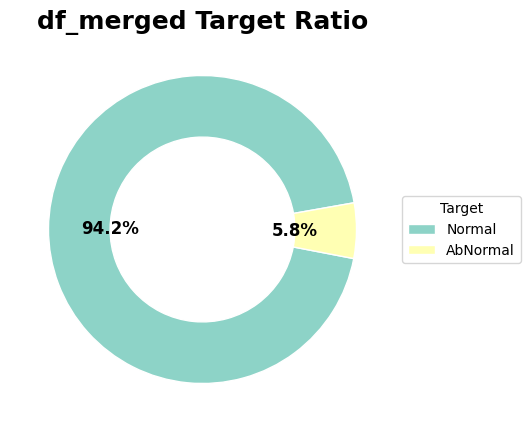

In [973]:
import matplotlib.pyplot as plt

# 'target' 변수의 비율 계산
target_ratio = df_merged['target'].value_counts(normalize=True)

# 색상 팔레트 설정
colors = plt.get_cmap('Set3')(range(len(target_ratio)))

# 도넛 차트 그리기
fig, ax = plt.subplots(figsize=(5, 5))
wedges, texts, autotexts = ax.pie(
    target_ratio, 
    autopct='%1.1f%%', 
    startangle=10, 
    colors=colors, 
    wedgeprops=dict(width=0.4, edgecolor='w')
)

# 차트 제목 추가
ax.set_title('df_merged Target Ratio', fontsize=18, fontweight='bold')

# 레이블 및 퍼센트 텍스트 스타일 설정
plt.setp(texts, size=14, weight='bold', color='black')
plt.setp(autotexts, size=12, weight='bold', color='black')

# 범례 추가
ax.legend(wedges, target_ratio.index, title="Target", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# 차트 표시
plt.show()

In [974]:
# 'Workorder - Dam'의 값이 '3'으로 시작하는 행 필터링
filtered_df_1 = df_merged[df_merged['Workorder - Dam'].str.startswith('3')]

# 'Set ID'의 9번째 값이 '3'인 행 필터링
filtered_df_2 = filtered_df_1[filtered_df_1['Set ID'].str[10] == '3']

# 타겟 변수의 비율 계산
target_variable_counts = filtered_df_2['target'].value_counts(normalize=True)
print(target_variable_counts)

Normal      0.936793
AbNormal    0.063207
Name: target, dtype: float64


In [975]:
# 'Workorder - Dam'의 값이 '3'으로 시작하는 행 필터링
filtered_df_1 = df_merged[df_merged['Workorder - Dam'].str.startswith('4')]

# 'Set ID'의 10번째 값이 '3'인 행 필터링
filtered_df_2 = filtered_df_1[filtered_df_1['Set ID'].str[10] == '4']

# 타겟 변수의 비율 계산
target_variable_counts = filtered_df_2['target'].value_counts(normalize=True)
print(target_variable_counts)

Normal      0.955449
AbNormal    0.044551
Name: target, dtype: float64


In [976]:
# 'Workorder - Dam'의 값이 '3'으로 시작하는 행 필터링
filtered_df_1 = df_merged[df_merged['Workorder - Dam'].str.startswith('3')]

# 'Set ID'의 11번째 값이 '4'인 행 필터링
filtered_df_2 = filtered_df_1[filtered_df_1['Set ID'].str[10] == '4']

# 타겟 변수의 비율 계산
target_variable_counts = filtered_df_2['target'].value_counts(normalize=True)
print(target_variable_counts)

Normal      0.962963
AbNormal    0.037037
Name: target, dtype: float64


In [977]:
# 'Workorder - Dam'의 값이 '4'으로 시작하는 행 필터링
filtered_df_1 = df_merged[df_merged['Workorder - Dam'].str.startswith('4')]

# 'Set ID'의 11번째 값이 '3'인 행 필터링
filtered_df_2 = filtered_df_1[filtered_df_1['Set ID'].str[10] == '3']

# 타겟 변수의 비율 계산
target_variable_counts = filtered_df_2['target'].value_counts(normalize=True)
print(target_variable_counts)

Normal      0.938895
AbNormal    0.061105
Name: target, dtype: float64


workorder 값의 첫번째가 3또는 4인 부분과 Set ID 의 11번째 값이 3또는 4인 값인 부분에서  
공통점이 있을거 같아서 분석해봤는데 유의미한지 잘 모르겠음

In [978]:
# 'Set ID' 변수의 앞 1~9째자리 값을 추출
df_merged['ID_1'] = df_merged['Set ID'].str[0:9]

df_merged['ID_1'].value_counts()

OP7533450    40506
Name: ID_1, dtype: int64

In [979]:
# 'Set ID' 변수의 앞 1~9째자리 값을 추출
df_merged['ID_1'] = df_merged['Set ID'].str[9:11]

df_merged['ID_1'].value_counts()

13    26715
14     7105
54     2542
23     2226
24     1164
73      219
63      105
53       93
74       91
33       90
34       72
84       50
64       24
83       10
Name: ID_1, dtype: int64

In [980]:
# 'Set ID' 변수의 앞 1~9째자리 값을 추출
df_merged['ID_2'] = df_merged['Set ID'].str[9:10]

df_merged['ID_2'].value_counts()

1    33820
2     3390
5     2635
7      310
3      162
6      129
8       60
Name: ID_2, dtype: int64

In [981]:
df_AutoClave['Set ID'].value_counts().head(5)

OP753345013080001009    4
OP753345013060003926    4
OP753345013060001622    4
OP753345013050001894    4
OP753345013060001680    4
Name: Set ID, dtype: int64

In [982]:
# 'Set ID' 변수의 앞 1~9째자리 값을 추출
df_AutoClave['ID_1'] = df_AutoClave['Set ID'].str[0:9]

In [983]:
df_AutoClave['ID_1'].value_counts()

OP7533450    42446
Name: ID_1, dtype: int64

In [984]:
# 'Set ID' 10째자리 값을 추출
df_AutoClave['ID_2'] = df_AutoClave['Set ID'].str[9]

df_AutoClave['ID_2'].value_counts()

1    35432
2     3601
5     2744
7      312
3      162
6      133
8       62
Name: ID_2, dtype: int64

1~8의 값중에서 4가 빠진 7종류의 값

In [985]:
# 'Set ID' 변수의 앞 11째자리 값을 추출
df_AutoClave['ID_3'] = df_AutoClave['Set ID'].str[10]

df_AutoClave['ID_3'].value_counts()

3    30971
4    11475
Name: ID_3, dtype: int64

3 또는 4의 값을 가짐

In [986]:
# 'Set ID' 변수의 앞 12~13째자리 값을 추출
df_AutoClave['ID_4'] = df_AutoClave['Set ID'].str[11:13]

df_AutoClave['ID_4'].value_counts()

12    5180
06    4975
11    4104
10    3984
01    3775
09    3640
07    3543
05    2982
03    2715
08    2563
02    2537
04    2448
Name: ID_4, dtype: int64

01~12까지 있는 월을 의미하는것으로 보임

In [987]:
# 'Set ID' 변수의 앞 14~16째자리 값을 추출
df_AutoClave['ID_4'] = df_AutoClave['Set ID'].str[13:16]

df_AutoClave['ID_4'].value_counts()

000    42446
Name: ID_4, dtype: int64

동일하게 000의 값

In [988]:
# 'Set ID' 변수의 앞 17~마지막째자리 값을 추출
df_AutoClave['ID_5'] = df_AutoClave['Set ID'].str[16:]

df_AutoClave['ID_5'].value_counts()

0004    34
0018    31
0008    31
0002    30
0006    29
        ..
6788     1
6786     1
6779     1
6770     1
5381     1
Name: ID_5, Length: 6951, dtype: int64

마지막 4째자리는 순번 정도의 의미일것으로 보임

In [989]:
# 'ID_3' 값에 대한 'target' 변수의 비율 계산

# 'ID_3'가 '3'인 행들 필터링
filtered_df_0 = df_AutoClave[df_AutoClave['ID_3'] == '3']

# 'ID_3'가 '4'인 행들 필터링
filtered_df_1 = df_AutoClave[df_AutoClave['ID_3'] == '4']

# 'target' 변수의 비율 계산
filtered_df_0 = filtered_df_0['target'].value_counts(normalize=True)
filtered_df_1 = filtered_df_1['target'].value_counts(normalize=True)

# 비율 출력
print("Target ratio for ID_3 = 0:")
print(filtered_df_0)
print("\nTarget ratio for ID_3 = 1:")
print(filtered_df_1)

Target ratio for ID_3 = 0:
Normal      0.891189
AbNormal    0.108811
Name: target, dtype: float64

Target ratio for ID_3 = 1:
Normal      0.919913
AbNormal    0.080087
Name: target, dtype: float64


In [990]:
# df_AutoClave 타겟변수 비율 출력
AutoClave_target_ratio = df_AutoClave['target'].value_counts(normalize=True)

print(AutoClave_target_ratio)

Normal      0.898954
AbNormal    0.101046
Name: target, dtype: float64


차이가 크게 나타나지는 않는것으로 보임

### 5. Collect Date

Time compare code 참고

### 6. Insp. Seq No.

In [991]:
df_merged['Insp. Seq No. - Dam'].value_counts()

1    40506
Name: Insp. Seq No. - Dam, dtype: int64

In [992]:
df_merged['Insp. Seq No. - Fill1'].value_counts()

1    40506
Name: Insp. Seq No. - Fill1, dtype: int64

In [993]:
df_merged['Insp. Seq No. - Fill2'].value_counts()

1    40506
Name: Insp. Seq No. - Fill2, dtype: int64

In [994]:
df_merged['Insp. Seq No. - AutoClave'].value_counts()

1    40506
Name: Insp. Seq No. - AutoClave, dtype: int64

병합한 데이터인 merged에서는 1값만 존재  

In [995]:
df_AutoClave['Insp. Seq No.'].value_counts()

1    40508
2     1809
3      119
4       10
Name: Insp. Seq No., dtype: int64

df_AutoClave 이외에도 원본 Dam,Fill1,Fill2 등 에서는 2,3,4 값이 존재  
(base code의 병합하는 과정에서 지워지는것으로 보임)

In [996]:
# 'Insp. Seq No.' 값에 대한 'target' 변수의 비율 계산

# 'Insp. Seq No.'가 '1'인 행들 필터링
filtered_df_1 = df_AutoClave[df_AutoClave['Insp. Seq No.'] == 1]

# 'Insp. Seq No.'가 '2'인 행들 필터링
filtered_df_2 = df_AutoClave[df_AutoClave['Insp. Seq No.'] == 2]

# 'Insp. Seq No.'가 '3'인 행들 필터링
filtered_df_3 = df_AutoClave[df_AutoClave['Insp. Seq No.'] == 3]

# 'Insp. Seq No.'가 '4'인 행들 필터링
filtered_df_4 = df_AutoClave[df_AutoClave['Insp. Seq No.'] == 4]

# 'target' 변수의 비율 계산

filtered_df_1 = filtered_df_1['target'].value_counts(normalize=True)
filtered_df_2 = filtered_df_2['target'].value_counts(normalize=True)
filtered_df_3 = filtered_df_3['target'].value_counts(normalize=True)
filtered_df_4 = filtered_df_4['target'].value_counts(normalize=True)

# 비율 출력

print("\nTarget ratio for Insp. Seq No. = 1:")
print(filtered_df_1)
print("Target ratio for Insp. Seq No. = 2:")
print(filtered_df_2)
print("\nTarget ratio for Insp. Seq No. = 3:")
print(filtered_df_3)
print("\nTarget ratio for Insp. Seq No. = 4:")
print(filtered_df_4)


Target ratio for Insp. Seq No. = 1:
Normal      0.941937
AbNormal    0.058063
Name: target, dtype: float64
Target ratio for Insp. Seq No. = 2:
AbNormal    0.999447
Normal      0.000553
Name: target, dtype: float64

Target ratio for Insp. Seq No. = 3:
AbNormal    1.0
Name: target, dtype: float64

Target ratio for Insp. Seq No. = 4:
AbNormal    1.0
Name: target, dtype: float64


Insp. Seq No. = 1 이 아닌값에 대해서는 AbNormal일 확률이 높음  

### 7. Insp Judge Code

In [997]:
df_AutoClave['Insp Judge Code'].value_counts()

OK    42446
Name: Insp Judge Code, dtype: int64

In [998]:
# 병합한 데이터에서의 'Insp Judge Code - AutoClave' 변수의 값 분포
df_merged['Insp Judge Code - AutoClave'].value_counts()

OK    40506
Name: Insp Judge Code - AutoClave, dtype: int64

모든 값에 대해서 OK 값 1종류 존재

In [999]:
df_AutoClave.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42446 entries, 0 to 42445
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Wip Line                       42446 non-null  object 
 1   Process Desc.                  42446 non-null  object 
 2   Equipment                      42446 non-null  object 
 3   Model.Suffix                   42446 non-null  object 
 4   Workorder                      42446 non-null  object 
 5   LOT ID                         42446 non-null  object 
 6   Set ID                         42446 non-null  object 
 7   Box ID                         0 non-null      float64
 8   Collect Date                   42446 non-null  object 
 9   Insp. Seq No.                  42446 non-null  int64  
 10  Insp Judge Code                42446 non-null  object 
 11  1st Pressure                   42446 non-null  float64
 12  1st Pressure.1                 42446 non-null 

### 8. 1st Pressure - Collect Result, Unit Time, Judge Value

In [1000]:
df_AutoClave['1st Pressure']

0        0.312
1        0.312
2        0.314
3        0.304
4        0.312
         ...  
42441    0.301
42442    0.301
42443    0.301
42444    0.301
42445    0.301
Name: 1st Pressure, Length: 42446, dtype: float64

In [1001]:
df_AutoClave['1st Pressure'].describe()

count    42446.000000
mean         0.307125
std          0.005376
min          0.290000
25%          0.302000
50%          0.308000
75%          0.312000
max          0.320000
Name: 1st Pressure, dtype: float64

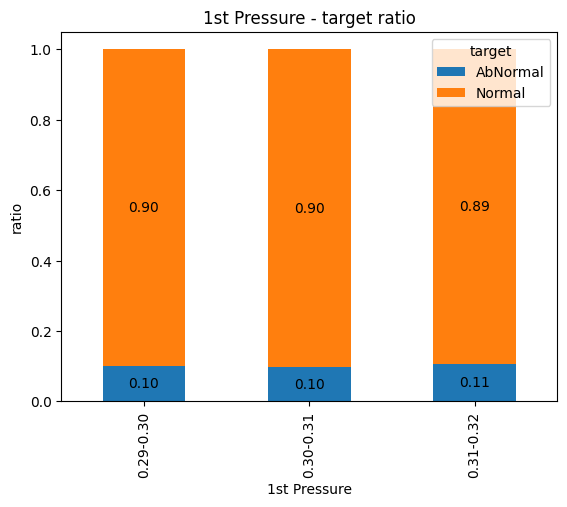

In [1002]:
import pandas as pd
import matplotlib.pyplot as plt

# 1st Pressure 값을 구간으로 나누기
bins = [0.29, 0.30, 0.31, 0.32]
labels = ['0.29-0.30', '0.30-0.31', '0.31-0.32']
df_AutoClave['Pressure_Bin'] = pd.cut(df_AutoClave['1st Pressure'], bins=bins, labels=labels, include_lowest=True)

# 각 구간에 대해 Normal과 abNormal의 비율 계산
pressure_target_counts = df_AutoClave.groupby('Pressure_Bin')['target'].value_counts(normalize=True).unstack()

# 막대그래프로 시각화
ax = pressure_target_counts.plot(kind='bar', stacked=True)
plt.xlabel('1st Pressure')
plt.ylabel('ratio')
plt.title('1st Pressure - target ratio')
plt.legend(title='target')

# 비율 수치 표시
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x + width / 2, y + height / 2, f'{height:.2f}', ha='center', va='center')

plt.show()

직관적인 수치에 대한 구간을 나누어 비율 비교를 했을때 큰 차이는 없음

In [1003]:
df_AutoClave['1st Pressure.1'].value_counts()

241    28907
240     9216
300     3877
181      231
180       76
61        47
0         42
1         31
60        19
Name: 1st Pressure.1, dtype: int64

In [1004]:
# '1st Pressure.1' 값의 마지막 숫자가 0인 경우
pressure_0 = df_AutoClave[df_AutoClave['1st Pressure.1'] % 10 == 0]
pressure_0_ratio = pressure_0.groupby('1st Pressure.1')['target'].value_counts(normalize=True).unstack()

# '1st Pressure.1' 값의 마지막 숫자가 1인 경우
pressure_1 = df_AutoClave[df_AutoClave['1st Pressure.1'] % 10 == 1]
pressure_1_ratio = pressure_1.groupby('1st Pressure.1')['target'].value_counts(normalize=True).unstack()

# 결과 출력
print("1st Pressure.1 값의 마지막 숫자가 0인 경우:")
print(pressure_0_ratio)
print("\n1st Pressure.1 값의 마지막 숫자가 1인 경우:")
print(pressure_1_ratio)

1st Pressure.1 값의 마지막 숫자가 0인 경우:
target          AbNormal    Normal
1st Pressure.1                    
0               0.380952  0.619048
60              0.578947  0.421053
180             0.302632  0.697368
240             0.117947  0.882053
300             0.152437  0.847563

1st Pressure.1 값의 마지막 숫자가 1인 경우:
target          AbNormal    Normal
1st Pressure.1                    
1               0.032258  0.967742
61              0.553191  0.446809
181             0.069264  0.930736
241             0.087107  0.912893


뒤의 숫자 기준으로 보았을때 뒷숫자 0 인 경우가 1일때보다 상대적으로 AbNormal 비율이 높음

In [1005]:
import pandas as pd

# '1st Pressure.1' 값의 마지막 숫자가 0인 경우
pressure_0 = df_AutoClave[df_AutoClave['1st Pressure.1'] % 10 == 0]
pressure_0_ratio = pressure_0['target'].value_counts(normalize=True)

# '1st Pressure.1' 값의 마지막 숫자가 1인 경우
pressure_1 = df_AutoClave[df_AutoClave['1st Pressure.1'] % 10 == 1]
pressure_1_ratio = pressure_1['target'].value_counts(normalize=True)

# 결과 출력
print("1st Pressure.1 값의 마지막 숫자가 0인 경우:")
print(pressure_0_ratio)
print("\n1st Pressure.1 값의 마지막 숫자가 1인 경우:")
print(pressure_1_ratio)

1st Pressure.1 값의 마지막 숫자가 0인 경우:
Normal      0.869388
AbNormal    0.130612
Name: target, dtype: float64

1st Pressure.1 값의 마지막 숫자가 1인 경우:
Normal      0.912343
AbNormal    0.087657
Name: target, dtype: float64


마지막 숫자 기준으로 그룹화 하여 수치 확인했을때 마지막 숫자 0인 경우가 AnNormal이 높음

In [1006]:
df_AutoClave['1st Pressure.2'].value_counts()

OK    42446
Name: 1st Pressure.2, dtype: int64

모든 값에 대해서 OK 값 1종류 존재

### 9. 2nd Pressure - Collect Result, Unit Time, Judge Value

In [1007]:
df_AutoClave['2nd Pressure'].value_counts()

0.490    5168
0.491    4945
0.492    4283
0.312    1665
0.311    1562
         ... 
0.297       3
0.452       2
0.322       2
0.803       1
0.806       1
Name: 2nd Pressure, Length: 67, dtype: int64

In [1008]:
df_AutoClave['2nd Pressure'].describe()

count    42446.000000
mean         0.396535
std          0.096093
min          0.297000
25%          0.309000
50%          0.316000
75%          0.491000
max          0.900000
Name: 2nd Pressure, dtype: float64

각 구간에 대한 타겟 변수의 갯수:
target        AbNormal  Normal
Pressure_Bin                  
0.2-0.3            168    1549
0.3-0.4           2251   18854
0.4-0.5           1610   15890
0.5-0.6            260    1814
0.6-0.7              0      19
0.7-0.8              0       5
0.8-0.9              0      26


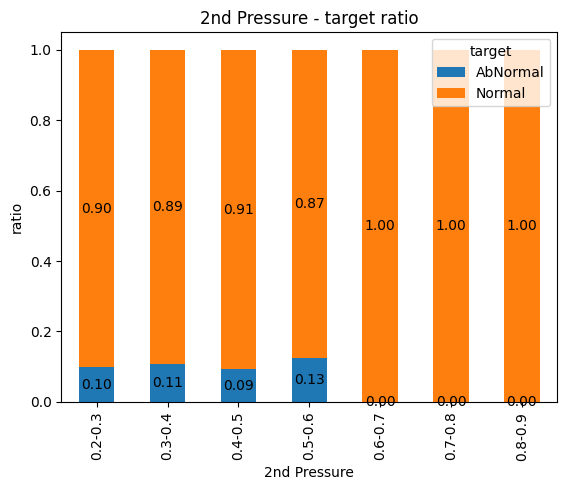

In [1009]:
import pandas as pd 
import matplotlib.pyplot as plt

# 2nd Pressure 값을 구간으로 나누기
bins = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9] 
labels = ['0.2-0.3', '0.3-0.4', '0.4-0.5', '0.5-0.6', '0.6-0.7', '0.7-0.8', '0.8-0.9'] 
df_AutoClave['Pressure_Bin'] = pd.cut(df_AutoClave['2nd Pressure'], bins=bins, labels=labels, include_lowest=True)

# 각 구간에 대해 Normal과 abNormal의 비율 계산
pressure_target_counts = df_AutoClave.groupby('Pressure_Bin')['target'].value_counts(normalize=True).unstack(fill_value=0)

# 각 구간에 대해 Normal과 abNormal의 갯수 계산
pressure_target_total_counts = df_AutoClave.groupby('Pressure_Bin')['target'].value_counts().unstack(fill_value=0)

# 갯수 출력
print("각 구간에 대한 타겟 변수의 갯수:")
print(pressure_target_total_counts)

# 막대그래프로 시각화
ax = pressure_target_counts.plot(kind='bar', stacked=True) 
plt.xlabel('2nd Pressure') 
plt.ylabel('ratio') 
plt.title('2nd Pressure - target ratio') 
plt.legend(title='target')

# 비율 수치 표시
for p in ax.patches: 
    width, height = p.get_width(), p.get_height() 
    x, y = p.get_xy() 
    ax.text(x + width / 2, y + height / 2, f'{height:.2f}', ha='center', va='center')

plt.show()


0.6이상이면 Normal만 존재 -> 갯수로 봤을때 적은양이라 유의미한지는 모르겟음

In [1010]:
df_AutoClave['2nd Pressure.1'].value_counts()

1      19956
121    11268
120     5146
60      3667
90      2005
0        182
150       90
61        71
181       54
180        7
Name: 2nd Pressure.1, dtype: int64

In [1011]:
# '2nd Pressure.1' 값의 마지막 숫자가 0인 경우
pressure_0 = df_AutoClave[df_AutoClave['2nd Pressure.1'] % 10 == 0]
pressure_0_ratio = pressure_0.groupby('2nd Pressure.1')['target'].value_counts(normalize=True).unstack()

# '1st Pressure.1' 값의 마지막 숫자가 1인 경우
pressure_1 = df_AutoClave[df_AutoClave['2nd Pressure.1'] % 10 == 1]
pressure_1_ratio = pressure_1.groupby('2nd Pressure.1')['target'].value_counts(normalize=True).unstack()

# 결과 출력
print("2nd Pressure.1 값의 마지막 숫자가 0인 경우:")
print(pressure_0_ratio)
print("\n2nd Pressure.1 값의 마지막 숫자가 1인 경우:")
print(pressure_1_ratio)

2nd Pressure.1 값의 마지막 숫자가 0인 경우:
target          AbNormal    Normal
2nd Pressure.1                    
0               0.065934  0.934066
60              0.153804  0.846196
90              0.065337  0.934663
120             0.152351  0.847649
150             0.155556  0.844444
180             0.714286  0.285714

2nd Pressure.1 값의 마지막 숫자가 1인 경우:
target          AbNormal    Normal
2nd Pressure.1                    
1               0.085689  0.914311
61              0.211268  0.788732
121             0.092386  0.907614
181             0.240741  0.759259


In [1012]:
import pandas as pd

# '2nd Pressure.1' 값의 마지막 숫자가 0인 경우
pressure_0 = df_AutoClave[df_AutoClave['2nd Pressure.1'] % 10 == 0]
pressure_0_ratio = pressure_0['target'].value_counts(normalize=True)

# '2nd Pressure.1' 값의 마지막 숫자가 1인 경우
pressure_1 = df_AutoClave[df_AutoClave['2nd Pressure.1'] % 10 == 1]
pressure_1_ratio = pressure_1['target'].value_counts(normalize=True)

# 결과 출력
print("2nd Pressure.1 값의 마지막 숫자가 0인 경우:")
print(pressure_0_ratio)
print("\n2nd Pressure.1 값의 마지막 숫자가 1인 경우:")
print(pressure_1_ratio)

2nd Pressure.1 값의 마지막 숫자가 0인 경우:
Normal      0.863927
AbNormal    0.136073
Name: target, dtype: float64

2nd Pressure.1 값의 마지막 숫자가 1인 경우:
Normal      0.911353
AbNormal    0.088647
Name: target, dtype: float64


1st Pressure.1와 동일하게 마지막 숫자 기준으로 그룹화 하여 수치 확인했을때  
마지막 숫자가 0인 경우에 AnNormal이 높음

In [1013]:
df_AutoClave['2nd Pressure.2'].value_counts()

OK    42446
Name: 2nd Pressure.2, dtype: int64

모든 값에 대해서 OK 값 1종류 존재

### 10. 3nd Pressure - Collect Result, Unit Time, Judge Value

In [1014]:
df_AutoClave.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42446 entries, 0 to 42445
Data columns (total 38 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Wip Line                       42446 non-null  object  
 1   Process Desc.                  42446 non-null  object  
 2   Equipment                      42446 non-null  object  
 3   Model.Suffix                   42446 non-null  object  
 4   Workorder                      42446 non-null  object  
 5   LOT ID                         42446 non-null  object  
 6   Set ID                         42446 non-null  object  
 7   Box ID                         0 non-null      float64 
 8   Collect Date                   42446 non-null  object  
 9   Insp. Seq No.                  42446 non-null  int64   
 10  Insp Judge Code                42446 non-null  object  
 11  1st Pressure                   42446 non-null  float64 
 12  1st Pressure.1                 4

In [1015]:
df_AutoClave['3rd Pressure'].value_counts()

0.498    8952
0.499    8825
0.500    8351
0.497    6463
0.501    4106
         ... 
0.506       2
0.698       2
0.451       2
0.823       1
0.824       1
Name: 3rd Pressure, Length: 71, dtype: int64

In [1016]:
df_AutoClave['3rd Pressure'].describe()

count    42446.000000
mean         0.501034
std          0.025280
min          0.305000
25%          0.498000
50%          0.499000
75%          0.500000
max          0.914000
Name: 3rd Pressure, dtype: float64

각 구간에 대한 타겟 변수의 갯수:
target        AbNormal  Normal
Pressure_Bin                  
0.3-0.4             65     307
0.4-0.5           3394   31682
0.5-0.6            801    6042
0.6-0.7             29      95
0.7-0.8              0       5
0.8-0.9              0       2
0.9-1                0      24


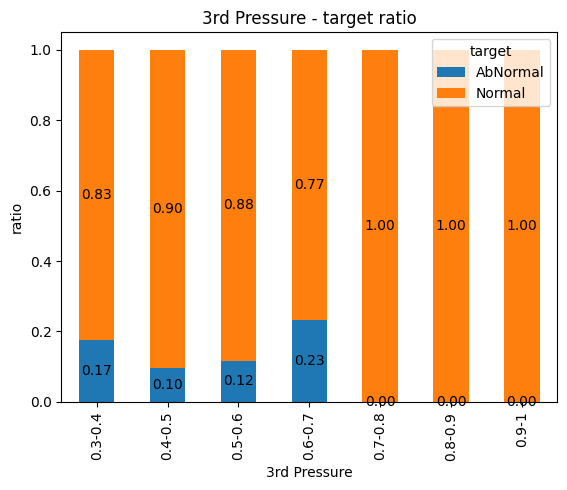

In [1017]:
import pandas as pd 
import matplotlib.pyplot as plt

# 3rd Pressure 값을 구간으로 나누기
bins = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
labels = ['0.3-0.4', '0.4-0.5', '0.5-0.6', '0.6-0.7', '0.7-0.8', '0.8-0.9', '0.9-1']
df_AutoClave['Pressure_Bin'] = pd.cut(df_AutoClave['3rd Pressure'], bins=bins, labels=labels, include_lowest=True)

# 각 구간에 대해 Normal과 abNormal의 비율 계산
pressure_target_counts = df_AutoClave.groupby('Pressure_Bin')['target'].value_counts(normalize=True).unstack(fill_value=0)

# 각 구간에 대해 Normal과 abNormal의 갯수 계산
pressure_target_total_counts = df_AutoClave.groupby('Pressure_Bin')['target'].value_counts().unstack(fill_value=0)

# 갯수 출력
print("각 구간에 대한 타겟 변수의 갯수:")
print(pressure_target_total_counts)

# 막대그래프로 시각화
ax = pressure_target_counts.plot(kind='bar', stacked=True) 
plt.xlabel('3rd Pressure') 
plt.ylabel('ratio') 
plt.title('3rd Pressure - target ratio') 
plt.legend(title='target')

# 비율 수치 표시
for p in ax.patches: 
    width, height = p.get_width(), p.get_height() 
    x, y = p.get_xy() 
    ax.text(x + width / 2, y + height / 2, f'{height:.2f}', ha='center', va='center')

plt.show()


In [1018]:
df_AutoClave['3rd Pressure.1'].value_counts()

121    28181
120    11989
150     1745
181      247
90       103
180       67
60        58
61        37
1         10
241        8
301        1
Name: 3rd Pressure.1, dtype: int64

In [1019]:
# '3rd Pressure.1' 값의 마지막 숫자가 0인 경우
pressure_0 = df_AutoClave[df_AutoClave['3rd Pressure.1'] % 10 == 0]
pressure_0_ratio = pressure_0.groupby('3rd Pressure.1')['target'].value_counts(normalize=True).unstack()

# '3rd Pressure.1' 값의 마지막 숫자가 1인 경우
pressure_1 = df_AutoClave[df_AutoClave['3rd Pressure.1'] % 10 == 1]
pressure_1_ratio = pressure_1.groupby('3rd Pressure.1')['target'].value_counts(normalize=True).unstack()

# 결과 출력
print("3rd Pressure.1 값의 마지막 숫자가 0인 경우:")
print(pressure_0_ratio)
print("\n3rd Pressure.1 값의 마지막 숫자가 1인 경우:")
print(pressure_1_ratio)

3rd Pressure.1 값의 마지막 숫자가 0인 경우:
target          AbNormal    Normal
3rd Pressure.1                    
60              0.275862  0.724138
90              0.106796  0.893204
120             0.123697  0.876303
150             0.157593  0.842407
180             0.283582  0.716418

3rd Pressure.1 값의 마지막 숫자가 1인 경우:
target          AbNormal    Normal
3rd Pressure.1                    
1               0.300000  0.700000
61              0.675676  0.324324
121             0.086619  0.913381
181             0.064777  0.935223
241                  NaN  1.000000
301                  NaN  1.000000


In [1020]:
import pandas as pd

# '3rd Pressure.1' 값의 마지막 숫자가 0인 경우
pressure_0 = df_AutoClave[df_AutoClave['3rd Pressure.1'] % 10 == 0]
pressure_0_ratio = pressure_0['target'].value_counts(normalize=True)

# '3rd Pressure.1' 값의 마지막 숫자가 1인 경우
pressure_1 = df_AutoClave[df_AutoClave['3rd Pressure.1'] % 10 == 1]
pressure_1_ratio = pressure_1['target'].value_counts(normalize=True)

# 결과 출력
print("3rd Pressure.1 값의 마지막 숫자가 0인 경우:")
print(pressure_0_ratio)
print("\n3rd Pressure.1 값의 마지막 숫자가 1인 경우:")
print(pressure_1_ratio)

3rd Pressure.1 값의 마지막 숫자가 0인 경우:
Normal      0.870792
AbNormal    0.129208
Name: target, dtype: float64

3rd Pressure.1 값의 마지막 숫자가 1인 경우:
Normal      0.912758
AbNormal    0.087242
Name: target, dtype: float64


In [1021]:
df_AutoClave['3rd Pressure.2'].value_counts()

OK    42446
Name: 3rd Pressure.2, dtype: int64

모든 값에 대해서 OK 값 1종류 존재

### 11. Chamber Temp. - Collect Result, Unit Time, Judge Value

In [1022]:
df_AutoClave['Chamber Temp.'].value_counts()

54    8742
49    6113
50    5986
53    5603
48    3470
55    3445
52    2207
47    1848
56    1774
51    1624
57     978
46     392
58     108
45      37
36      34
32      23
43      20
38       8
33       7
37       6
35       5
44       4
59       4
40       3
34       2
41       2
42       1
Name: Chamber Temp., dtype: int64

In [1023]:
df_AutoClave['Chamber Temp..1'].value_counts()

363    15421
483    11256
480     6478
361     4111
510     1844
452     1555
450      430
362      418
481      394
360      184
512       90
540       77
423       57
301       38
212       24
300       15
183       13
303       11
243       10
180        6
242        6
3          4
61         3
121        1
Name: Chamber Temp..1, dtype: int64

In [1024]:
df_AutoClave['Chamber Temp..2'].value_counts()

OK    30576
NG    11870
Name: Chamber Temp..2, dtype: int64

In [1025]:
# 'Chamber Temp..2' 값에 대한 'target' 변수의 비율 계산

# 'Chamber Temp..2'가 '1'인 행들 필터링
filtered_df_OK = df_AutoClave[df_AutoClave['Chamber Temp..2'] == 'OK']

# 'Chamber Temp..2'가 '2'인 행들 필터링
filtered_df_NG = df_AutoClave[df_AutoClave['Chamber Temp..2'] == 'NG']

# 'target' 변수의 비율 계산
filtered_df_OK = filtered_df_OK['target'].value_counts(normalize=True)
filtered_df_NG = filtered_df_NG['target'].value_counts(normalize=True)

# 비율 출력
print("\nTarget ratio for Chamber Temp..2 = OK:")
print(filtered_df_OK)
print("Target ratio for Chamber Temp..2 = NG:")
print(filtered_df_NG)



Target ratio for Chamber Temp..2 = OK:
Normal      0.896553
AbNormal    0.103447
Name: target, dtype: float64
Target ratio for Chamber Temp..2 = NG:
Normal      0.905139
AbNormal    0.094861
Name: target, dtype: float64


### 12. GMES_ORIGIN_INSP_JUDGE_CODE - Collect Result, Unit Time, Judge Value

In [1026]:
df_AutoClave['GMES_ORIGIN_INSP_JUDGE_CODE'].value_counts()

OK    11728
Name: GMES_ORIGIN_INSP_JUDGE_CODE, dtype: int64

In [1027]:
# 'GMES_ORIGIN_INSP_JUDGE_CODE' 값에 대한 'target' 변수의 비율 계산

# 'GMES_ORIGIN_INSP_JUDGE_CODE'가 '1'인 행들 필터링
filtered_df_OK = df_AutoClave[df_AutoClave['GMES_ORIGIN_INSP_JUDGE_CODE'] == 'OK']

# 'target' 변수의 비율 계산
filtered_df_OK = filtered_df_OK['target'].value_counts(normalize=True)

# 비율 출력
print("\nTarget ratio for GMES_ORIGIN_INSP_JUDGE_CODE = OK:")
print(filtered_df_OK)



Target ratio for GMES_ORIGIN_INSP_JUDGE_CODE = OK:
Normal      0.920617
AbNormal    0.079383
Name: target, dtype: float64


In [1028]:
df_AutoClave['GMES_ORIGIN_INSP_JUDGE_CODE.1'].value_counts()

Series([], Name: GMES_ORIGIN_INSP_JUDGE_CODE.1, dtype: int64)

In [1029]:
df_AutoClave['GMES_ORIGIN_INSP_JUDGE_CODE.2'].value_counts()

OK    11728
Name: GMES_ORIGIN_INSP_JUDGE_CODE.2, dtype: int64

In [1030]:
# 'GMES_ORIGIN_INSP_JUDGE_CODE' 값에 대한 'target' 변수의 비율 계산

# 'GMES_ORIGIN_INSP_JUDGE_CODE'가 '1'인 행들 필터링
filtered_df_OK = df_AutoClave[df_AutoClave['GMES_ORIGIN_INSP_JUDGE_CODE.2'] == 'OK']

# 'target' 변수의 비율 계산
filtered_df_OK = filtered_df_OK['target'].value_counts(normalize=True)

# 비율 출력
print("\nTarget ratio for GMES_ORIGIN_INSP_JUDGE_CODE.2 = OK:")
print(filtered_df_OK)



Target ratio for GMES_ORIGIN_INSP_JUDGE_CODE.2 = OK:
Normal      0.920617
AbNormal    0.079383
Name: target, dtype: float64


In [1039]:
# 1. 'GMES_ORIGIN_INSP_JUDGE_CODE' 열이 'OK'인 행을 필터링
filtered_df = df_AutoClave[df_AutoClave['GMES_ORIGIN_INSP_JUDGE_CODE'] == 'OK']

# 2. 'GMES_ORIGIN_INSP_JUDGE_CODE.2' 열의 값이 'OK'인 경우와 아닌 경우를 계산
ok_count = filtered_df[filtered_df['GMES_ORIGIN_INSP_JUDGE_CODE.2'] == 'OK'].shape[0]
not_ok_count = filtered_df[filtered_df['GMES_ORIGIN_INSP_JUDGE_CODE.2'] != 'OK'].shape[0]

# 3. 각 경우의 비율을 계산
total_count = filtered_df.shape[0]
ok_ratio = ok_count / total_count
not_ok_ratio = not_ok_count / total_count

# 비율 출력
print("GMES_ORIGIN_INSP_JUDGE_CODE & GMES_ORIGIN_INSP_JUDGE_CODE.2")
print(f"둘다 'OK'인 경우의 비율: {ok_ratio:.2f}")
print(f"GMES_ORIGIN_INSP_JUDGE_CODE 만 'OK'인 경우의 비율: {not_ok_ratio:.2f}")

GMES_ORIGIN_INSP_JUDGE_CODE & GMES_ORIGIN_INSP_JUDGE_CODE.2
둘다 'OK'인 경우의 비율: 1.00
GMES_ORIGIN_INSP_JUDGE_CODE 만 'OK'인 경우의 비율: 0.00


GMES_ORIGIN_INSP_JUDGE_CODE, GMES_ORIGIN_INSP_JUDGE_CODE.2  
모두 값이 존재한다면 'ok'의 값을 가지고  
값이 존재하지 않을경우에는 둘다 동일하게 결측값을 가짐  